(271, 269)
Keras 
 [2.9283776e-05 1.4728474e-05 6.6331941e-06 1.4243226e-06 9.7330936e-05
 8.5608764e-03 9.8592049e-01 5.3509194e-08 5.3330767e-03 3.6045294e-05] 
Predicted: 6 (98%)


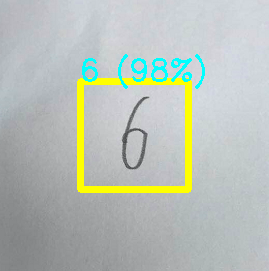

In [24]:
#!/usr/bin/env python3

from keras import layers
from keras import models
from keras.models import load_model
from keras.utils import to_categorical
from keras import backend as K
import numpy as np
import cv2
test_image = './data/photo_6.jpg'

p1 = 200
p2 = 80
ROI_ratio = 0.2
label_text_color = (0, 120, 0)
min_score_percent = 60

# Test image
input_image = cv2.imread(test_image)
sz = input_image.shape
cx = sz[0]//2
cy = sz[1]//2
ROI = int(sz[0]*ROI_ratio)
edges = cv2.Canny(input_image,p1,p2)
print(edges.shape)
cropped = edges[cx-ROI:cx+ROI,cy-ROI:cy+ROI]

kernel = np.ones((4,4),np.uint8)
cropped = cv2.dilate(cropped,kernel,iterations = 1)
cropped_input = cv2.resize(cropped,(28,28)) / 255.0
cv2.rectangle(input_image, (cy-ROI, cx-ROI), (cy+ROI, cx+ROI),(255,255,0), 5)

model = load_model('model.h5')

output = model.predict(cropped_input.reshape(1, 28, 28, 1))[0]
predict_label = output.argmax()
percentage = int(output[predict_label] * 100)
label_text = str(predict_label) + " (" + str(percentage) + "%)"
print("Keras \r\n", output, '\r\nPredicted:',label_text)
if percentage >= min_score_percent:
    cv2.putText(input_image, label_text, (cy-ROI - 1, cx-ROI - 1),cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2)
else:
    cv2.putText(input_image, '?', (cy-ROI - 1, cx-ROI - 1),cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2)

Image.fromarray(input_image)


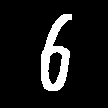

In [25]:
from PIL import Image
Image.fromarray(cropped)

In [5]:
from ImageProcessor import ImageProcessor
import cv2

In [6]:
processor = ImageProcessor()

In [7]:
test_image = './data/photo_6.jpg'
input_image = cv2.imread(test_image)
cropped_input, cropped = processor.preprocess_image(input_image)

In [26]:
cropped = np.stack((cropped,)*3, -1)
input_image[-cropped.shape[0]:, -cropped.shape[1]:] = cropped

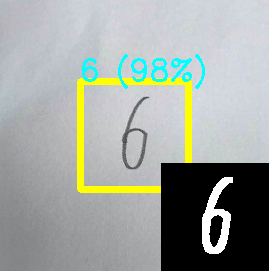

In [28]:
Image.fromarray(input_image)

In [14]:
c1.shape

(108, 108, 3)

In [17]:
a = list(range(100))

In [20]:
a[-8:]

[92, 93, 94, 95, 96, 97, 98, 99]